<a href="https://colab.research.google.com/github/spiky-ganglia/action-selection/blob/master/Action_Selection_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Moment-to-Moment Action Selection NeuroMatch Dataset provided by Jeffrey Markowitz
by email July 22, 2020 \\
re: [The Striatum Organizes 3D Behavior via Moment-to-Moment Action Selection](https://www.cell.com/cell/pdf/S0092-8674(18)30512-9.pdf)

In [1]:
# load repository if not already loaded
import os

if not os.path.exists('/content/action-selection'):
  os.system('git clone https://github.com/spiky-ganglia/action-selection.git')
else:
  print('The repository data is already loaded')

### Jeffrey's notebook

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%load_ext nb_black

In [3]:
import h5py
#import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
use_file = '/content/action-selection/data/neuromatch_export.h5'

In [5]:
def printall(name, obj):
    print(name, dict(obj.attrs))

In [6]:
with h5py.File(use_file, "r") as f:
    # each session is mapped to a uuid
    uuids = list(f.keys())
    
    # print the attributes for a single dataset
    f[uuids[0]].visititems(printall) 
    
    # load in the data for the first session
    dspn_dff = f[uuids[0]]["dspn_dff"][()].ravel()
    ispn_dff = f[uuids[0]]["ispn_dff"][()].ravel()
    timestamps = f[uuids[0]]["timestamps"][()].ravel()
    syllables = f[uuids[0]]["syllables"][()].ravel()

date {'description': 'date of session', 'dtype': 'string'}
dspn_dff {'description': 'df/f for dspns (RCaMP)', 'dtype': 'single'}
ispn_dff {'description': 'df/f for ispns (GCaMP)', 'dtype': 'single'}
mouse_id {'description': 'ID of mouse', 'dtype': 'string'}
syllables {'description': 'Syllable labels (sorted by usage)', 'dtype': 'int16'}
timestamps {'description': 'timestamps in seconds', 'dtype': 'single'}


In [7]:
# random shuffle the index of the jet colour map
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.jet(vals))

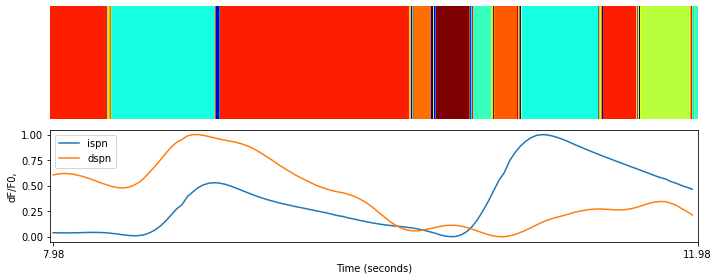

In [8]:
# plot a slice of normalised ispn and dspn data vs timestamps
fig, ax = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
plt_pts = slice(240, 360)
min_i = np.min(ispn_dff[plt_pts])
max_i = np.max(ispn_dff[plt_pts])
min_d = np.min(dspn_dff[plt_pts])
max_d = np.max(dspn_dff[plt_pts])
ax[0].imshow(np.tile(syllables[plt_pts], [100, 1]), aspect="auto", cmap=cmap)
ax[0].axis("off")
ax[1].plot((ispn_dff[plt_pts] - min_i) / (max_i - min_i), label='ispn')
ax[1].plot((dspn_dff[plt_pts] - min_d) / (max_d - min_d), label='dspn')
ax[1].set_xticks((0, (plt_pts.stop - plt_pts.start)))
ax[1].set_xticklabels(np.around(timestamps[[plt_pts.start, plt_pts.stop]], 2))
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("dF/F0,")
ax[1].legend()
plt.tight_layout()

### resources

link | what it's for
--- | ---
[Python and HDF5](https://docs.google.com/viewer?a=v&pid=sites&srcid=b2JqZWN0bWFnZS5jb218cHJpdmF0ZS10cmFpbmluZ3xneDoyNWIzNmI3YWFhOTFmMjU2) | h5py info in book format
[HDF - EOS Tools and Information Centre](http://hdfeos.org/software/tool.php) | NASA recommended (and not recommended) software tools for HDF files 
[seaborn introduction](https://seaborn.pydata.org/introduction.html) | seaborn introduces itself
[Offical seaborn tutorial](https://seaborn.pydata.org/tutorial.html#tutorial) | by Michael Waskom (also course reviewer for Neuromatch Academy courses)
[Pandas tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) | Pandas' reference to various tutorials and getting started guides
[supplemental information](https://www.cell.com/cell/fulltext/S0092-8674(18)30512-9?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867418305129%3Fshowall%3Dtrue) | for the paper "The Striatum Organizes 3D Behavior via Moment-to-Moment Action Selection"


### project tasks

Organise tasks by priority:

task | possible methodology | completed?
--- | --- | ---
find `date` and `mouse_id` values | use hdf5 to extract and list values | yes
what data are in each dataset? | use hdf5 to list dataset structures | yes
how many unique syllables per dataset? | use hdf5 to access syllable data and count unique syllables | yes
split out syllable sequences by -5 syllable marker | use hdf5 to find start of syllable sequences and save each sequence | no


### datasets summary

We assume that each record (or row) in a dataset is sequential in time, as given by the use of the timestamps column in the plots above. It would be a good idea though to check if all timestamps are in sequence and without missing data.

### Dataset record sizes

Each dataset has differing record sizes and record sizes can vary within a dataset. Syllable datasets are often smaller in size, but may be larger.

The cause of this discrepancy is unknown and it may affect the integrity of the data.

In [9]:
with h5py.File(use_file, "r") as f:

  # each session is mapped to a uuid
  uuids = list(f.keys())
  print('Number of datasets:', len(uuids))

  for key in range(len(uuids)):
    print(uuids[key])
    dspn_dff = f[uuids[0]]["dspn_dff"][()].ravel()
    ispn_dff = f[uuids[0]]["ispn_dff"][()].ravel()
    timestamps = f[uuids[0]]["timestamps"][()].ravel()
    syllables = f[uuids[key]]["syllables"][()].ravel()
    ispn_dff = f[uuids[0]]["ispn_dff"][()].ravel()
    print('Record size for dspn, ispn, timestamps, syllables:')
    print(dspn_dff.shape[0], ispn_dff.shape[0], timestamps.shape[0], syllables.shape[0])
    print()

Number of datasets: 48
11a979f0-c3eb-4860-98bc-942e85986af7
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35979

141a4484-a55e-4a72-a202-6458493482b0
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35959

221e3512-1bfd-4f12-ad1f-e7f34c91d291
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35978

235fecc5-f01d-4605-9efc-56736a96b824
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35977

2924d8bb-9226-4799-916d-e751340b31a5
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35983

2c50ef9a-be62-4888-8ab0-f4dd0ca80f2c
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35983

37163d2d-280a-4982-acec-a11b717e86d2
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35959

3a919b3a-d8ce-4f30-80c5-64ad44e54894
Record size for dspn, ispn, timestamps, syllables:
35979 35979 35979 35979

3bc8b711-b02e-4a13-a2a1-613ad50f6da8
Record size for dspn, ispn, timestam

### date field

Each dataset has a unique date and time.

In [10]:
with h5py.File(use_file, "r") as f:

  # each session is mapped to a uuid
  uuids = list(f.keys())
  print('Number of datasets:', len(uuids))

  for key in range(len(uuids)):
    print(uuids[key])
    date_ = f[uuids[key]]["date"][()].ravel()
    print(date_)
    print()

Number of datasets: 48
11a979f0-c3eb-4860-98bc-942e85986af7
['01-Jul-2017 11:07:02']

141a4484-a55e-4a72-a202-6458493482b0
['09-Jun-2017 18:23:24']

221e3512-1bfd-4f12-ad1f-e7f34c91d291
['28-Jun-2017 16:22:01']

235fecc5-f01d-4605-9efc-56736a96b824
['28-Apr-2017 14:39:03']

2924d8bb-9226-4799-916d-e751340b31a5
['12-Jun-2017 18:01:03']

2c50ef9a-be62-4888-8ab0-f4dd0ca80f2c
['18-Jul-2017 13:17:43']

37163d2d-280a-4982-acec-a11b717e86d2
['14-Jun-2017 17:57:00']

3a919b3a-d8ce-4f30-80c5-64ad44e54894
['22-Jun-2017 15:49:57']

3bc8b711-b02e-4a13-a2a1-613ad50f6da8
['09-May-2017 12:22:04']

40424ad3-bc2b-42b5-895a-300a23be355c
['22-Jun-2017 16:50:54']

4695bf1e-9561-4dfb-9371-58cd33282cf1
['08-Jun-2017 18:43:29']

518b4218-64bd-4f34-ab60-0b5b3e988bc8
['27-Jun-2017 17:32:19']

520266a4-2ccb-4601-b39e-82a342d99f60
['03-Jun-2017 10:33:09']

5aa0211f-3692-4b46-a821-d06d17ef7227
['18-Jul-2017 15:03:34']

5e43deab-1e6b-42f4-9a9f-93f6fd7e3493
['19-Jun-2017 16:35:23']

62437e0c-d207-4078-ab81-06313dc3

### mouse id

There are 8 unique mouse id's.

In [11]:
with h5py.File(use_file, "r") as f:
  # each session is mapped to a uuid
  uuids = list(f.keys())
  mouse_id = []

  for key in range(len(uuids)):
    print(uuids[key])
    mouse_id.append(f[uuids[key]]["mouse_id"][()].ravel())
    print(mouse_id[-1])
    print()

  print('Unique mouse ids:', np.unique(np.array(mouse_id)))
  print ('Number of unique mouse ids:', np.unique(np.array(mouse_id)).shape[0])

11a979f0-c3eb-4860-98bc-942e85986af7
['1538']

141a4484-a55e-4a72-a202-6458493482b0
['1532']

221e3512-1bfd-4f12-ad1f-e7f34c91d291
['1538']

235fecc5-f01d-4605-9efc-56736a96b824
['19938']

2924d8bb-9226-4799-916d-e751340b31a5
['1554']

2c50ef9a-be62-4888-8ab0-f4dd0ca80f2c
['1554']

37163d2d-280a-4982-acec-a11b717e86d2
['19938']

3a919b3a-d8ce-4f30-80c5-64ad44e54894
['1538']

3bc8b711-b02e-4a13-a2a1-613ad50f6da8
['19842']

40424ad3-bc2b-42b5-895a-300a23be355c
['1546']

4695bf1e-9561-4dfb-9371-58cd33282cf1
['1538']

518b4218-64bd-4f34-ab60-0b5b3e988bc8
['1554']

520266a4-2ccb-4601-b39e-82a342d99f60
['1532']

5aa0211f-3692-4b46-a821-d06d17ef7227
['1555']

5e43deab-1e6b-42f4-9a9f-93f6fd7e3493
['1538']

62437e0c-d207-4078-ab81-06313dc366c4
['1546']

673b4dae-5c4e-463e-9ac6-4c48c9aa767b
['1555']

6c1c5645-e3c7-4bc7-93cd-15261fc96495
['1532']

70d80df4-7edc-44e5-b31d-ec274d4857e8
['1555']

746c4e99-3cd6-495c-9f3f-ba27446b67da
['1546']

762bf6a8-608b-49d3-932a-dfb4c3f41ecb
['1555']

76ea893c-3

### unique syllables per dataset

The number of unique syllables in each dataset varies. It appears that syllable labels remain constant across all datasets (i.e. one label per syllable). There are 99 unique syllables across all datasets and the maximum syllable index is 100.

In [12]:
with h5py.File(use_file, "r") as f:
  # each session is mapped to a uuid
  uuids = list(f.keys())
  syllables_ = []
    
  # print the unique syllables and number for each dataset
  for key in range(len(uuids)):
    print(uuids[key])
    syllables_.append(np.unique(f[uuids[key]]["syllables"][()].ravel()))
    print(syllables_[-1])
    print('Max syllable index:', max(syllables_[-1]))
    print('Number of unique syllables in this dataset:', len(syllables_[-1]))
    print()

syllables__ = []

for s in syllables_:
  syllables__.extend(s)

print('Number of unique syllables in all datasets:', (np.unique(np.array(syllables__))).shape[0])
print('Max syllable index in all datasets:', max(np.unique(np.array(syllables__))))

11a979f0-c3eb-4860-98bc-942e85986af7
[-5  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94]
Max syllable index: 94
Number of unique syllables in this dataset: 95

141a4484-a55e-4a72-a202-6458493482b0
[-5  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 79 80 82 83 84 85 86 88 89 92 93]
Max syllable index: 93
Number of unique syllables in this dataset: 89

221e3512-1bfd-4f12-ad1f-e7f34c91d291
[-5  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60

### Syllable sequence markers

Find `-5` syllable markers in syllable dataset, print marker locations and count number of markers. The `-5` marker is only used at the beginning of a dataset and doesn't define syllable sequences.

In [13]:
with h5py.File(use_file, "r") as f:
  
  # each session is mapped to a uuid
  uuids = list(f.keys())

  # print the unique syllables and number for each dataset
  for key in range(len(uuids)):
    print(uuids[key])
    s = np.where(f[uuids[key]]["syllables"][()].ravel() == -5)[0]
    print(s)
    print('Number of markers in this dataset:', len(s))
    print()

11a979f0-c3eb-4860-98bc-942e85986af7
[0]
Number of markers in this dataset: 1

141a4484-a55e-4a72-a202-6458493482b0
[0]
Number of markers in this dataset: 1

221e3512-1bfd-4f12-ad1f-e7f34c91d291
[0]
Number of markers in this dataset: 1

235fecc5-f01d-4605-9efc-56736a96b824
[0 1 2]
Number of markers in this dataset: 3

2924d8bb-9226-4799-916d-e751340b31a5
[0]
Number of markers in this dataset: 1

2c50ef9a-be62-4888-8ab0-f4dd0ca80f2c
[0]
Number of markers in this dataset: 1

37163d2d-280a-4982-acec-a11b717e86d2
[0]
Number of markers in this dataset: 1

3a919b3a-d8ce-4f30-80c5-64ad44e54894
[0]
Number of markers in this dataset: 1

3bc8b711-b02e-4a13-a2a1-613ad50f6da8
[0 1 2]
Number of markers in this dataset: 3

40424ad3-bc2b-42b5-895a-300a23be355c
[0]
Number of markers in this dataset: 1

4695bf1e-9561-4dfb-9371-58cd33282cf1
[0]
Number of markers in this dataset: 1

518b4218-64bd-4f34-ab60-0b5b3e988bc8
[0]
Number of markers in this dataset: 1

520266a4-2ccb-4601-b39e-82a342d99f60
[0]
Num

### Syllable sequence markers 2

Check other values for marker potential. At first glance there's no way to tell if a syllable sequence marker is present. The next test should be to find syllables positioned the furthest apart.

In [14]:
with h5py.File(use_file, "r") as f:
  
  # each session is mapped to a uuid
  uuids = list(f.keys())

  # print the syllables and number for each in dataset
  for key in range(len(uuids)):
    print(uuids[key])
    sylls = f[uuids[key]]["syllables"][()].ravel()

    for s in range(1, 101):
      matching = np.where(sylls == s)[0]
      if len(matching) > 0:
        print('Number of matching syllables for:', s, len(matching)) 

    print()

11a979f0-c3eb-4860-98bc-942e85986af7
Number of matching syllables for: 1 524
Number of matching syllables for: 2 290
Number of matching syllables for: 3 727
Number of matching syllables for: 4 902
Number of matching syllables for: 5 173
Number of matching syllables for: 6 1163
Number of matching syllables for: 7 633
Number of matching syllables for: 8 726
Number of matching syllables for: 9 654
Number of matching syllables for: 10 178
Number of matching syllables for: 11 451
Number of matching syllables for: 12 582
Number of matching syllables for: 13 274
Number of matching syllables for: 14 716
Number of matching syllables for: 15 1945
Number of matching syllables for: 16 408
Number of matching syllables for: 17 259
Number of matching syllables for: 18 991
Number of matching syllables for: 19 295
Number of matching syllables for: 20 920
Number of matching syllables for: 21 1653
Number of matching syllables for: 22 517
Number of matching syllables for: 23 261
Number of matching syllabl

### Syllable transitions

On each syllable change store the previous syllable, count and index. The list `syl_values` holds the syllable transitions, `syl_counts` the number of times each syllable was repeated, and `syl_indices` the index of every syllable.

Syllable transitions can then be examined for repeating patterns.

In [16]:
with h5py.File(use_file, "r") as f:
  
  # parts
  uuids = list(f.keys())

  # print the syllable transition stats
  syl_values = [] 
  syl_counts = []
  syl_indices = []

  where = np.flatnonzero

  for key in range(len(uuids)):
    print(uuids[key])
    sylls = f[uuids[key]]["syllables"][()].ravel()
    
    # taken from https://gist.github.com/nvictus/66627b580c13068589957d6ab0919e66
    # perform run length encoding to pack syllables
    indices = np.r_[0, where(~np.isclose(sylls[1:], sylls[:-1], equal_nan=True)) + 1]
    counts = np.diff(np.r_[indices, sylls.shape[0]])
    values = sylls[indices]

    syl_indices.append(indices)
    syl_counts.append(counts)
    syl_values.append(values)

    print('Number of syllable transitions:', indices.shape[0])
    print('Max length of syllables:', np.max(counts))
    print('Min length of syllables:', np.min(counts))
    print('Median length of syllables:', np.median(counts))
    print('Mode length of syllables:', np.median(counts))
    print()

11a979f0-c3eb-4860-98bc-942e85986af7
Number of syllable transitions: 2655
Max length of syllables: 114
Min length of syllables: 1
Median length of syllables: 10.0
Mode length of syllables: 10.0

141a4484-a55e-4a72-a202-6458493482b0
Number of syllable transitions: 3250
Max length of syllables: 98
Min length of syllables: 1
Median length of syllables: 8.0
Mode length of syllables: 8.0

221e3512-1bfd-4f12-ad1f-e7f34c91d291
Number of syllable transitions: 2683
Max length of syllables: 126
Min length of syllables: 1
Median length of syllables: 10.0
Mode length of syllables: 10.0

235fecc5-f01d-4605-9efc-56736a96b824
Number of syllable transitions: 2991
Max length of syllables: 117
Min length of syllables: 1
Median length of syllables: 8.0
Mode length of syllables: 8.0

2924d8bb-9226-4799-916d-e751340b31a5
Number of syllable transitions: 3413
Max length of syllables: 93
Min length of syllables: 1
Median length of syllables: 8.0
Mode length of syllables: 8.0

2c50ef9a-be62-4888-8ab0-f4dd0ca80

### Syllable patterns

From the syllable transitions list extract syllable patterns and counts.

### spiky-ganglia-project data analysis

Possible goals:
* make nice bar graphs!

In [ ]:
import pandas as pd
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### algernon project stored in algernon repository